In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import joblib
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# checking the locations data
local = pd.read_csv('locations.csv')
local

,id,latitude,longitude
0,1,32.030100,71.879210
1,2,32.361531,74.699502
2,3,30.257478,73.675744
3,4,33.271899,73.188238
4,5,30.399851,70.431850
...,...,...,...
295,296,33.086954,73.120171
296,297,29.251913,70.983320
297,298,30.473824,72.061493
298,299,32.798478,71.275385


In [3]:
# merge_0
merge_0 = pd.read_csv('Old_data/merg0.csv')
merge_0

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,location_id
0,11/22/2023 0:00,82.4,53.7,435,2.5,4.4,48,5,27.8894167,71.37526358,39
1,11/22/2023 1:00,79.6,51.8,430,2.7,3.9,43,4,27.8894167,71.37526358,39
2,11/22/2023 2:00,77.8,50.6,423,3,3.2,37,4,27.8894167,71.37526358,39
3,11/22/2023 3:00,75.9,49.5,424,3,3.5,40,4,27.8894167,71.37526358,39
4,11/22/2023 4:00,81.3,52.7,443,2.3,5.7,62,6,27.8894167,71.37526358,39
...,...,...,...,...,...,...,...,...,...,...,...
386494,4/30/2024 19:00,21.7,13.3,270,9.7,2.6,70,9,33.40743947,72.39115291,63
386495,4/30/2024 20:00,19.6,12.2,280,10.4,2.6,64,7,33.40743947,72.39115291,63
386496,4/30/2024 21:00,19,12,294,11.8,2.7,58,6,33.40743947,72.39115291,63
386497,4/30/2024 22:00,19.1,12.2,313,14.8,2.8,49,5,33.40743947,72.39115291,63


In [4]:
# checking for nan
merge_0.isnull().sum()

date                0
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
dust                0
latitude            0
longitude           0
location_id         0
dtype: int64

In [5]:
# checking for duplicates
merge_0.duplicated().sum()

98

In [6]:
# seeing the duplicates
merge_0[merge_0.duplicated()]

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,location_id
7729,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
11594,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
15459,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
19324,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
23189,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
...,...,...,...,...,...,...,...,...,...,...,...
367174,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
371039,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
374904,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
378769,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id


In [7]:
merge_0.nunique()

date                3865
pm10                1419
pm2_5               1179
carbon_monoxide     4793
nitrogen_dioxide    1247
sulphur_dioxide     1174
ozone                273
dust                 995
latitude             101
longitude            101
location_id          101
dtype: int64

In [8]:
# merge_1 data
merge_1 = pd.read_csv('Old_data/merg1.csv')
merge_1

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,location_id
0,11/22/2023 0:00,116.6,74.7,615,4.2,9.6,60,11,28.05269959,70.76158656,111
1,11/22/2023 1:00,112.7,72.2,599,4.2,8.7,56,10,28.05269959,70.76158656,111
2,11/22/2023 2:00,110.1,70.5,576,4.1,7.6,50,9,28.05269959,70.76158656,111
3,11/22/2023 3:00,105.5,67.8,553,3.8,8,54,9,28.05269959,70.76158656,111
4,11/22/2023 4:00,105.9,68,537,2.9,12,75,12,28.05269959,70.76158656,111
...,...,...,...,...,...,...,...,...,...,...,...
386494,4/30/2024 19:00,36.6,24.2,967,67.8,4.5,6,6,33.78853684,73.25949767,113
386495,4/30/2024 20:00,34.5,22.8,951,63.1,3.9,6,6,33.78853684,73.25949767,113
386496,4/30/2024 21:00,32.1,21.2,913,57.2,3.3,7,6,33.78853684,73.25949767,113
386497,4/30/2024 22:00,28.3,18.7,842,50,2.7,6,5,33.78853684,73.25949767,113


In [9]:
# checking for nan\
merge_1.isnull().sum()

date                0
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
dust                0
latitude            0
longitude           0
location_id         0
dtype: int64

In [10]:
# checking for duplicates
merge_1.duplicated().sum()

98

In [11]:
# seeing the duplicates
merge_1[merge_1.duplicated()]

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,location_id
7729,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
11594,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
15459,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
19324,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
23189,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
...,...,...,...,...,...,...,...,...,...,...,...
367174,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
371039,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
374904,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
378769,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id


In [12]:
merge_1.nunique()

date                3865
pm10                1408
pm2_5               1156
carbon_monoxide     4639
nitrogen_dioxide    1398
sulphur_dioxide     1193
ozone                275
dust                 951
latitude             101
longitude            101
location_id          101
dtype: int64

In [13]:
# merge_2 data
merge_2 = pd.read_csv('Old_data/merg2.csv')
merge_2

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,location_id
0,11/22/2023 0:00,146.2,92.7,766,7.7,17.9,64,18,28.05917077,70.47201177,292
1,11/22/2023 1:00,142,89.9,739,7.5,16.5,60,16,28.05917077,70.47201177,292
2,11/22/2023 2:00,137.4,87.1,700,7.1,14.7,56,15,28.05917077,70.47201177,292
3,11/22/2023 3:00,129,82,653,6.3,14.7,60,14,28.05917077,70.47201177,292
4,11/22/2023 4:00,122,77.5,596,4.7,18.7,80,17,28.05917077,70.47201177,292
...,...,...,...,...,...,...,...,...,...,...,...
386494,4/30/2024 19:00,22.1,14.8,424,24,3.3,69,4,33.88915876,72.7194445,233
386495,4/30/2024 20:00,19.8,13.4,390,21.2,3.2,69,3,33.88915876,72.7194445,233
386496,4/30/2024 21:00,18.6,12.5,370,19.6,3.1,67,3,33.88915876,72.7194445,233
386497,4/30/2024 22:00,17.8,11.9,376,20,2.7,58,3,33.88915876,72.7194445,233


In [14]:
# checking for nan
merge_2.isnull().sum()

date                0
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
dust                0
latitude            0
longitude           0
location_id         0
dtype: int64

In [15]:
# checking for duplicates
merge_2.duplicated().sum()

98

In [16]:
# seeing the duplicates
merge_2[merge_2.duplicated()]

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,location_id
7729,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
11594,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
15459,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
19324,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
23189,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
...,...,...,...,...,...,...,...,...,...,...,...
367174,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
371039,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
374904,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id
378769,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,id


In [17]:
merge_2.nunique()

date                3865
pm10                1324
pm2_5               1185
carbon_monoxide     4965
nitrogen_dioxide    1475
sulphur_dioxide      842
ozone                281
dust                 641
latitude             101
longitude            101
location_id          101
dtype: int64

In [18]:
# removing duplicates from all the merge data
merge_0 = merge_0.drop_duplicates(keep=False).reset_index(drop=True)
merge_1 = merge_1.drop_duplicates(keep=False).reset_index(drop=True)
merge_2 = merge_2.drop_duplicates(keep=False).reset_index(drop=True)

In [19]:
merge_0.nunique()

date                3864
pm10                1418
pm2_5               1178
carbon_monoxide     4792
nitrogen_dioxide    1246
sulphur_dioxide     1173
ozone                272
dust                 994
latitude             100
longitude            100
location_id          100
dtype: int64

In [20]:
# joining the merge data
merge_data = pd.concat([merge_0, merge_1, merge_2], axis=0)

In [21]:
merge_data

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,location_id
0,11/22/2023 0:00,82.4,53.7,435,2.5,4.4,48,5,27.8894167,71.37526358,39
1,11/22/2023 1:00,79.6,51.8,430,2.7,3.9,43,4,27.8894167,71.37526358,39
2,11/22/2023 2:00,77.8,50.6,423,3,3.2,37,4,27.8894167,71.37526358,39
3,11/22/2023 3:00,75.9,49.5,424,3,3.5,40,4,27.8894167,71.37526358,39
4,11/22/2023 4:00,81.3,52.7,443,2.3,5.7,62,6,27.8894167,71.37526358,39
...,...,...,...,...,...,...,...,...,...,...,...
386395,4/30/2024 19:00,22.1,14.8,424,24,3.3,69,4,33.88915876,72.7194445,233
386396,4/30/2024 20:00,19.8,13.4,390,21.2,3.2,69,3,33.88915876,72.7194445,233
386397,4/30/2024 21:00,18.6,12.5,370,19.6,3.1,67,3,33.88915876,72.7194445,233
386398,4/30/2024 22:00,17.8,11.9,376,20,2.7,58,3,33.88915876,72.7194445,233


In [22]:
merge_data.nunique()

date                3864
pm10                1423
pm2_5               1188
carbon_monoxide     5095
nitrogen_dioxide    1496
sulphur_dioxide     1205
ozone                280
dust                1012
latitude             300
longitude            300
location_id          300
dtype: int64

In [23]:
# duplicate check
merge_data.duplicated().sum()

0

In [24]:
merge_data.columns

Index(['date', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'dust', 'latitude', 'longitude',
       'location_id'],
      dtype='object')

In [25]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159200 entries, 0 to 386399
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   date              1159200 non-null  object
 1   pm10              1159200 non-null  object
 2   pm2_5             1159200 non-null  object
 3   carbon_monoxide   1159200 non-null  object
 4   nitrogen_dioxide  1159200 non-null  object
 5   sulphur_dioxide   1159200 non-null  object
 6   ozone             1159200 non-null  object
 7   dust              1159200 non-null  object
 8   latitude          1159200 non-null  object
 9   longitude         1159200 non-null  object
 10  location_id       1159200 non-null  object
dtypes: object(11)
memory usage: 106.1+ MB


In [26]:
# converting the features except data to float
for col in merge_data.columns[1:]:
    merge_data[col] = merge_data[col].astype('float64')

In [27]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159200 entries, 0 to 386399
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   date              1159200 non-null  object 
 1   pm10              1159200 non-null  float64
 2   pm2_5             1159200 non-null  float64
 3   carbon_monoxide   1159200 non-null  float64
 4   nitrogen_dioxide  1159200 non-null  float64
 5   sulphur_dioxide   1159200 non-null  float64
 6   ozone             1159200 non-null  float64
 7   dust              1159200 non-null  float64
 8   latitude          1159200 non-null  float64
 9   longitude         1159200 non-null  float64
 10  location_id       1159200 non-null  float64
dtypes: float64(10), object(1)
memory usage: 106.1+ MB


In [28]:
# Calculate the AQI using weekly dataset. Using the weights formula:

merge_data['AQI'] = merge_data['pm2_5'] * 0.25 + merge_data['pm10'] * 0.25 + merge_data['nitrogen_dioxide'] * 0.15 + merge_data['sulphur_dioxide'] * 0.1 + merge_data['carbon_monoxide'] * 0.1 + merge_data['ozone'] * 0.1 + merge_data['dust'] * 0.05

In [29]:
merge_data

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,latitude,longitude,location_id,AQI
0,11/22/2023 0:00,82.4,53.7,435.0,2.5,4.4,48.0,5.0,27.889417,71.375264,39.0,83.390
1,11/22/2023 1:00,79.6,51.8,430.0,2.7,3.9,43.0,4.0,27.889417,71.375264,39.0,81.145
2,11/22/2023 2:00,77.8,50.6,423.0,3.0,3.2,37.0,4.0,27.889417,71.375264,39.0,79.070
3,11/22/2023 3:00,75.9,49.5,424.0,3.0,3.5,40.0,4.0,27.889417,71.375264,39.0,78.750
4,11/22/2023 4:00,81.3,52.7,443.0,2.3,5.7,62.0,6.0,27.889417,71.375264,39.0,85.215
...,...,...,...,...,...,...,...,...,...,...,...,...
386395,4/30/2024 19:00,22.1,14.8,424.0,24.0,3.3,69.0,4.0,33.889159,72.719444,233.0,62.655
386396,4/30/2024 20:00,19.8,13.4,390.0,21.2,3.2,69.0,3.0,33.889159,72.719444,233.0,57.850
386397,4/30/2024 21:00,18.6,12.5,370.0,19.6,3.1,67.0,3.0,33.889159,72.719444,233.0,54.875
386398,4/30/2024 22:00,17.8,11.9,376.0,20.0,2.7,58.0,3.0,33.889159,72.719444,233.0,54.245


In [30]:
merge_data.columns

Index(['date', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'dust', 'latitude', 'longitude',
       'location_id', 'AQI'],
      dtype='object')

In [31]:
# dropping other features
needed_feats = ['date', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'dust',
       'location_id']
merge_data_1 = merge_data[needed_feats]
merge_data_1

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,location_id
0,11/22/2023 0:00,82.4,53.7,435.0,2.5,4.4,48.0,5.0,39.0
1,11/22/2023 1:00,79.6,51.8,430.0,2.7,3.9,43.0,4.0,39.0
2,11/22/2023 2:00,77.8,50.6,423.0,3.0,3.2,37.0,4.0,39.0
3,11/22/2023 3:00,75.9,49.5,424.0,3.0,3.5,40.0,4.0,39.0
4,11/22/2023 4:00,81.3,52.7,443.0,2.3,5.7,62.0,6.0,39.0
...,...,...,...,...,...,...,...,...,...
386395,4/30/2024 19:00,22.1,14.8,424.0,24.0,3.3,69.0,4.0,233.0
386396,4/30/2024 20:00,19.8,13.4,390.0,21.2,3.2,69.0,3.0,233.0
386397,4/30/2024 21:00,18.6,12.5,370.0,19.6,3.1,67.0,3.0,233.0
386398,4/30/2024 22:00,17.8,11.9,376.0,20.0,2.7,58.0,3.0,233.0


In [32]:
# converting the date to datetime
merge_data_1['date'] = pd.to_datetime(merge_data_1['date'])

merge_data_1

C:\Users\timmy\AppData\Local\Temp\ipykernel_23664\3114281681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data_1['date'] = pd.to_datetime(merge_data_1['date'])


,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,location_id
0,2023-11-22 00:00:00,82.4,53.7,435.0,2.5,4.4,48.0,5.0,39.0
1,2023-11-22 01:00:00,79.6,51.8,430.0,2.7,3.9,43.0,4.0,39.0
2,2023-11-22 02:00:00,77.8,50.6,423.0,3.0,3.2,37.0,4.0,39.0
3,2023-11-22 03:00:00,75.9,49.5,424.0,3.0,3.5,40.0,4.0,39.0
4,2023-11-22 04:00:00,81.3,52.7,443.0,2.3,5.7,62.0,6.0,39.0
...,...,...,...,...,...,...,...,...,...
386395,2024-04-30 19:00:00,22.1,14.8,424.0,24.0,3.3,69.0,4.0,233.0
386396,2024-04-30 20:00:00,19.8,13.4,390.0,21.2,3.2,69.0,3.0,233.0
386397,2024-04-30 21:00:00,18.6,12.5,370.0,19.6,3.1,67.0,3.0,233.0
386398,2024-04-30 22:00:00,17.8,11.9,376.0,20.0,2.7,58.0,3.0,233.0


In [33]:
merge_data_1.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1159200,2024-02-10 11:30:00.000000256,2023-11-22 00:00:00,2024-01-01 05:45:00,2024-02-10 11:30:00,2024-03-21 17:15:00,2024-04-30 23:00:00,NaN
pm10,1159200.0,90.423066,1.3,47.0,73.1,114.6,1505.0,62.696134
pm2_5,1159200.0,55.995746,0.9,25.7,41.3,72.2,380.9,43.705229
carbon_monoxide,1159200.0,885.076522,106.0,335.0,606.0,1159.0,7215.0,775.497061
nitrogen_dioxide,1159200.0,12.554139,0.0,2.9,7.5,16.1,175.6,15.199211
sulphur_dioxide,1159200.0,10.194906,0.0,4.6,7.7,13.2,192.4,9.064293
ozone,1159200.0,83.37103,0.0,51.0,79.0,115.0,327.0,41.368132
dust,1159200.0,26.164274,0.0,2.0,8.0,30.0,3671.0,56.169616
location_id,1159200.0,150.5,1.0,75.75,150.5,225.25,300.0,86.602097


In [34]:
merge_data_1.head()

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,location_id
0,2023-11-22 00:00:00,82.4,53.7,435.0,2.5,4.4,48.0,5.0,39.0
1,2023-11-22 01:00:00,79.6,51.8,430.0,2.7,3.9,43.0,4.0,39.0
2,2023-11-22 02:00:00,77.8,50.6,423.0,3.0,3.2,37.0,4.0,39.0
3,2023-11-22 03:00:00,75.9,49.5,424.0,3.0,3.5,40.0,4.0,39.0
4,2023-11-22 04:00:00,81.3,52.7,443.0,2.3,5.7,62.0,6.0,39.0


In [36]:
# rewriting the column names in Alphabetical order
merge_data_1 = merge_data_1.reindex(sorted(merge_data_1.columns), axis=1)
# making sure that the pollutant names start with capital letters
merge_data_1.columns = merge_data_1.columns.str.capitalize()

In [43]:
merge_data_1.head()

,Carbon_monoxide,Date,Dust,Location_id,Nitrogen_dioxide,Ozone,Pm10,Pm2_5,Sulphur_dioxide
0,435.0,2023-11-22 00:00:00,5.0,39.0,2.5,48.0,82.4,53.7,4.4
1,430.0,2023-11-22 01:00:00,4.0,39.0,2.7,43.0,79.6,51.8,3.9
2,423.0,2023-11-22 02:00:00,4.0,39.0,3.0,37.0,77.8,50.6,3.2
3,424.0,2023-11-22 03:00:00,4.0,39.0,3.0,40.0,75.9,49.5,3.5
4,443.0,2023-11-22 04:00:00,6.0,39.0,2.3,62.0,81.3,52.7,5.7


In [44]:
# saving the data as old_data.csv
merge_data_1.to_csv('Old_data/old_data.csv', index=False)

## Merging Old and New data

In [3]:
older_data = pd.read_csv('Old_data/older_data.csv')
old_data = pd.read_csv('Old_data/old_data.csv')
new_data = pd.read_csv('Old_data/new_data.csv')

In [4]:
# concatenating the old and new data by rows to form the final data
final_data = pd.concat([older_data, old_data, new_data.drop(columns=['District'])], axis=0).reset_index(drop=True)

In [5]:
final_data

,Carbon_monoxide,Date,District,Dust,Location_id,Nitrogen_dioxide,Ozone,Pm10,Pm2_5,Sulphur_dioxide
0,142.0,2023-05-01 00:00:00,Bahawalpur,8.0,39.0,1.4,54.0,22.3,13.2,1.0
1,143.0,2023-05-01 01:00:00,Bahawalpur,10.0,39.0,1.3,57.0,22.6,13.6,1.0
2,145.0,2023-05-01 02:00:00,Bahawalpur,12.0,39.0,1.3,61.0,23.2,13.6,0.9
3,145.0,2023-05-01 03:00:00,Bahawalpur,15.0,39.0,1.1,69.0,25.4,13.6,0.9
4,143.0,2023-05-01 04:00:00,Bahawalpur,18.0,39.0,0.9,79.0,28.8,14.4,1.0
...,...,...,...,...,...,...,...,...,...,...
2995195,579.0,2024-06-19 19:00:00,NaN,2.0,233.0,32.5,66.0,29.2,19.9,3.3
2995196,601.0,2024-06-19 20:00:00,NaN,2.0,233.0,33.6,50.0,27.5,18.7,2.9
2995197,599.0,2024-06-19 21:00:00,NaN,2.0,233.0,32.9,39.0,25.4,17.2,2.6
2995198,559.0,2024-06-19 22:00:00,NaN,1.0,233.0,29.2,32.0,22.9,15.5,2.3


In [6]:
# saving the final data
final_data.to_csv('final_data.csv', index=False)

# PM10

In [7]:
# pretending merged_data_1 is the final data
merge_data_1 = final_data.copy()

In [6]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Pm10')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

In [7]:
pivot_df

Location_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,54.1,67.8,75.2,43.9,35.6,27.5,75.0,47.1,53.6,57.9,...,51.1,32.5,64.0,69.4,64.0,43.9,61.5,48.2,29.5,31.4
2023-05-01 01:00:00,67.8,70.5,70.8,49.2,35.7,27.1,76.6,56.0,58.0,61.5,...,53.1,32.7,70.1,73.3,70.1,49.2,64.0,47.8,31.1,33.1
2023-05-01 02:00:00,72.6,69.6,76.1,56.2,36.9,27.5,74.3,57.2,61.7,65.9,...,67.5,33.4,70.3,70.8,70.3,56.2,60.8,50.4,33.1,35.7
2023-05-01 03:00:00,77.1,71.9,77.1,64.0,37.1,28.7,75.7,61.5,64.7,69.2,...,81.3,37.4,67.8,61.0,67.8,64.0,44.4,56.3,37.5,41.2
2023-05-01 04:00:00,79.4,74.5,75.4,65.7,39.6,30.2,74.5,65.7,65.7,74.5,...,79.4,40.5,65.4,62.4,65.4,65.7,36.9,58.8,44.8,47.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19 19:00:00,107.8,70.3,257.0,85.2,78.9,1300.1,228.2,80.1,149.5,139.2,...,129.9,461.0,111.1,68.2,111.1,85.2,167.2,120.6,51.2,65.7
2024-06-19 20:00:00,106.4,62.6,241.2,83.8,76.4,1329.9,228.6,83.6,143.4,122.5,...,128.5,514.1,96.9,62.4,96.9,83.8,164.8,133.2,50.5,61.5
2024-06-19 21:00:00,104.1,54.5,217.0,86.1,72.9,1199.5,238.0,86.8,133.2,103.1,...,132.2,502.9,88.5,57.0,88.5,86.1,143.4,141.1,51.0,60.1


In [8]:
# saving this data
pivot_df.to_csv('pol_data/pm_10_data.csv', index=True)

## Modeling


In [9]:
# Load the transformed dataset
pivot_df = pd.read_csv('pol_data/pm_10_data.csv',  index_col='Date', parse_dates=True)

In [10]:
# Normalize the data
pm_10_scaler = MinMaxScaler()
scaled_data = pm_10_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(pm_10_scaler, 'pm_10_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")

Input shape: (9684, 300, 300)
Output shape: (9684, 300)


In [35]:
print(30*24)
print(9684 - 9684*0.988)

720
116.20800000000054


In [44]:

# Split the data into training and test sets
train_size = int(len(X) * 0.925)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# seed for reproducibility
torch.manual_seed(0)

class PM10_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(PM10_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, 300, 300)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, 300, 300) for CNN
        x = self.conv1(x)  # Output shape: (batch_size, 64, 300)
        x = self.relu(x)
        x = self.pool(x)  # Output shape: (batch_size, 64, 150)
        
        x = self.conv2(x)  # Output shape: (batch_size, 128, 150)
        x = self.relu(x)
        x = self.pool(x)  # Output shape: (batch_size, 128, 75)
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, 75, 128) for LSTM
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Output shape: (batch_size, 75, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction, shape: (batch_size, hidden_size)
        out = self.relu(out)
        out = self.fc2(out)  # Final output shape: (batch_size, output_size) = (batch_size, 300)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = 300  # Number of features (locations)
hidden_size = 50
num_layers = 2
output_size = 300  # Number of locations to predict

# Instantiate the model
model = PM10_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

Epoch [1/20], Loss: 0.0027
Epoch [2/20], Loss: 0.0056
Epoch [3/20], Loss: 0.0038
Epoch [4/20], Loss: 0.0031
Epoch [5/20], Loss: 0.0028
Epoch [6/20], Loss: 0.0023
Epoch [7/20], Loss: 0.0020
Epoch [8/20], Loss: 0.0012
Epoch [9/20], Loss: 0.0019
Epoch [10/20], Loss: 0.0018
Epoch [11/20], Loss: 0.0017
Epoch [12/20], Loss: 0.0021
Epoch [13/20], Loss: 0.0011
Epoch [14/20], Loss: 0.0021
Epoch [15/20], Loss: 0.0017
Epoch [16/20], Loss: 0.0016
Epoch [17/20], Loss: 0.0015
Epoch [18/20], Loss: 0.0011
Epoch [19/20], Loss: 0.0015
Epoch [20/20], Loss: 0.0014
Test Loss: 0.0028


In [46]:
# Saving the model
model.eval()
torch.save(model.state_dict(), "pol_models/pm_10_model.pt")  

### Model evaluation


In [47]:
# Loading the model
model = PM10_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model.load_state_dict(torch.load('pol_models/pm_10_model.pt'))
model = model.to(device)
model.eval()  # Set the model to evaluation mode


PM10_CNN_LSTM(
  (conv1): Conv1d(300, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu): ReLU()
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(128, 50, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=50, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=300, bias=True)
)

In [48]:
# Create a DataLoader for the test dataset if not already created
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

predictions = []
actuals = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions.append(outputs.cpu().numpy())
        actuals.append(targets.cpu().numpy())

# Convert lists to arrays
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)


In [49]:
# calculating R2
from sklearn.metrics import r2_score

r2 = r2_score(actuals, predictions)
print(f'R² Score: {r2:.4f}')


R² Score: 0.7575


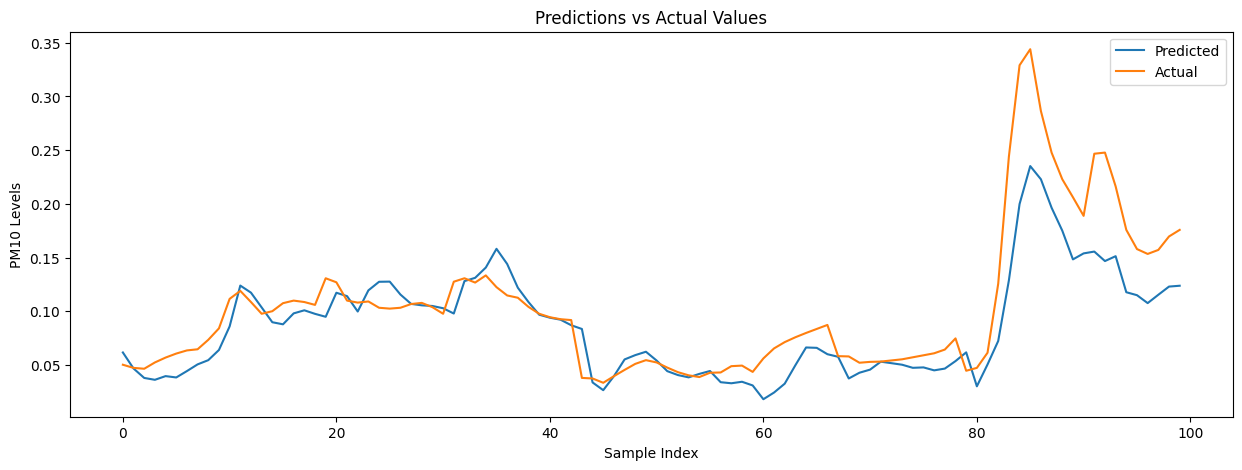

In [50]:
import matplotlib.pyplot as plt

# Plot the first 100 predictions vs actual values for a clearer view
plt.figure(figsize=(15, 5))
plt.plot(predictions[:100, 0], label='Predicted')
plt.plot(actuals[:100, 0], label='Actual')
plt.title('Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('PM10 Levels')
plt.legend()
plt.show()


In [51]:
# Split the data into training and test sets
train_size = int(len(X) * 0.925)
# Number of hours in 14 days
forecast_horizon = 14 * 24

# Start with the last sequence from the test data
last_sequence = X_test_tensor[-1].unsqueeze(0).to(device)

# Collect the predictions
forecasted_values = []

model.eval()
with torch.no_grad():
    current_sequence = last_sequence
    for _ in range(forecast_horizon):
        # Make prediction
        prediction = model(current_sequence)
        forecasted_values.append(prediction.cpu().numpy())

        # Update the sequence by appending the prediction and removing the first time step
        new_sequence = torch.cat((current_sequence[:, 1:, :], prediction.unsqueeze(1)), dim=1)
        current_sequence = new_sequence

# Convert list of arrays into a single array
forecasted_values = np.concatenate(forecasted_values, axis=0)

# Inverse transform the predictions to original scale
forecasted_values_inverse = pm_10_scaler.inverse_transform(forecasted_values)

# Convert to DataFrame for easier visualization
forecasted_df = pd.DataFrame(forecasted_values_inverse, columns=pivot_df.columns)
forecasted_df.index = pd.date_range(start=pivot_df.index[-1] + pd.Timedelta(hours=1), periods=forecast_horizon, freq='H')

# Display the forecasted DataFrame
forecasted_df.head()

C:\Users\timmy\AppData\Local\Temp\ipykernel_25972\770175260.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecasted_df.index = pd.date_range(start=pivot_df.index[-1] + pd.Timedelta(hours=1), periods=forecast_horizon, freq='H')


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0
2024-06-20 00:00:00,87.577278,64.933174,204.967682,71.298553,38.020851,1044.640503,171.855576,64.203087,122.238579,86.258675,...,193.413696,316.216919,91.992828,66.608665,97.333336,67.851212,81.176300,179.947235,67.839325,81.013969
2024-06-20 01:00:00,87.885597,77.960434,215.720078,76.296432,30.793884,927.149658,186.683975,65.702499,117.338737,89.631943,...,223.561020,323.250061,101.390755,81.738342,104.113304,68.942924,60.958778,200.223007,57.804443,70.064011
2024-06-20 02:00:00,92.140060,83.410614,233.904388,75.627052,28.990343,869.909790,206.737244,66.383934,113.072006,90.254486,...,236.860336,320.035309,99.264900,86.450500,101.754646,68.617172,56.306046,208.116119,58.038212,69.101265
2024-06-20 03:00:00,101.692764,73.263664,256.425323,76.741203,36.235783,863.452698,229.267883,69.169647,117.598953,91.342163,...,255.320419,341.961029,91.233086,80.874176,94.447556,71.341087,65.300560,228.474747,71.118950,77.594131
2024-06-20 04:00:00,118.814995,68.913086,309.785645,71.618774,57.356766,856.337769,275.174042,71.166122,119.200676,91.649612,...,286.113068,363.051239,82.797234,75.141548,85.593445,68.858307,80.083328,251.194504,93.979446,98.317970


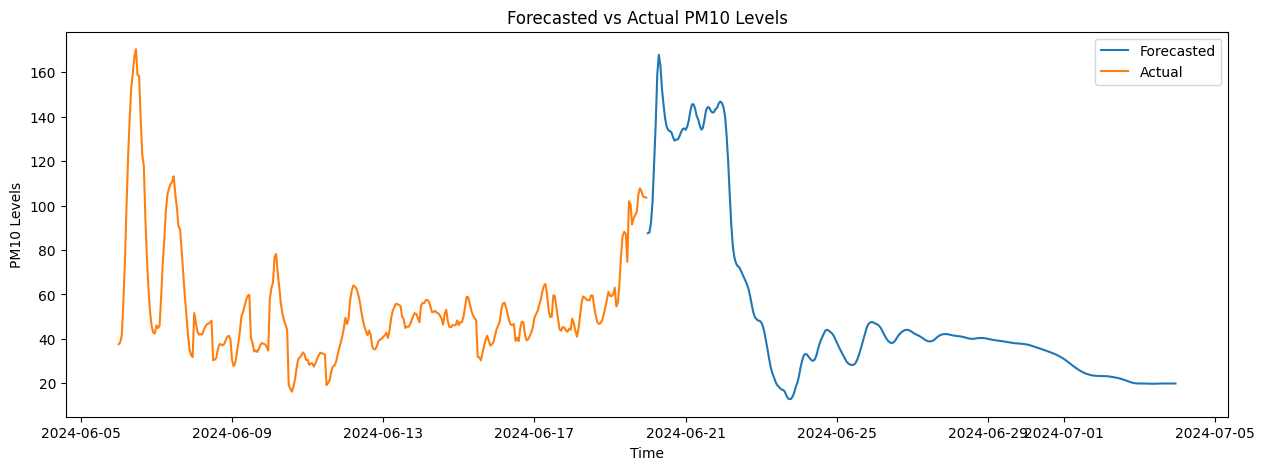

In [52]:
import matplotlib.pyplot as plt

# Plot the forecasted values
plt.figure(figsize=(15, 5))
plt.plot(forecasted_df.index, forecasted_df.iloc[:, 0], label='Forecasted')  # Assuming you want to plot the first location
plt.plot(pivot_df.index[-forecast_horizon:], pivot_df.iloc[-forecast_horizon:, 0], label='Actual')  # Plot the actual values for comparison
plt.title('Forecasted vs Actual PM10 Levels')
plt.xlabel('Time')
plt.ylabel('PM10 Levels')
plt.legend()
plt.show()


# PM25

In [53]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Pm2_5')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

In [54]:
# saving this data
pivot_df.to_csv('pol_data/pm_25_data.csv', index=True)

In [56]:
# Load the transformed dataset
pivot_df = pd.read_csv('pol_data/pm_25_data.csv',  index_col='Date', parse_dates=True)

In [57]:
# Normalize the data
pm_25_scaler = MinMaxScaler()
scaled_data = pm_25_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(pm_25_scaler, 'pm_25_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")

Input shape: (9684, 300, 300)
Output shape: (9684, 300)


In [ ]:
# Split the data into training and test sets
train_size = int(len(X) * 0.925)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [59]:
# Create DataLoader
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class PM25_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(PM25_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, lookback, num_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, num_features, lookback)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 64, lookback//2)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 128, lookback//4)
        x = self.dropout(x)
        
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, lookback//4, 128)
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Shape: (batch_size, lookback//4, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction
        out = self.relu(out)
        out = self.fc2(out)  # Shape: (batch_size, output_size)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2
output_size = X_train.shape[2]

# Instantiate the model
model = PM25_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Save the model state
torch.save(model.state_dict(), "pol_models/pm_25_model_state.pt")

Epoch [1/20], Loss: 0.0069
Epoch [2/20], Loss: 0.0077
Epoch [3/20], Loss: 0.0043
Epoch [4/20], Loss: 0.0072
Epoch [5/20], Loss: 0.0027
Epoch [6/20], Loss: 0.0036
Epoch [7/20], Loss: 0.0030
Epoch [8/20], Loss: 0.0031
Epoch [9/20], Loss: 0.0030
Epoch [10/20], Loss: 0.0039
Epoch [11/20], Loss: 0.0028
Epoch [12/20], Loss: 0.0039
Epoch [13/20], Loss: 0.0029
Epoch [14/20], Loss: 0.0019
Epoch [15/20], Loss: 0.0023
Epoch [16/20], Loss: 0.0017
Epoch [17/20], Loss: 0.0025
Epoch [18/20], Loss: 0.0020
Epoch [19/20], Loss: 0.0019
Epoch [20/20], Loss: 0.0029
Test Loss: 0.0020


R² Score: 0.5188


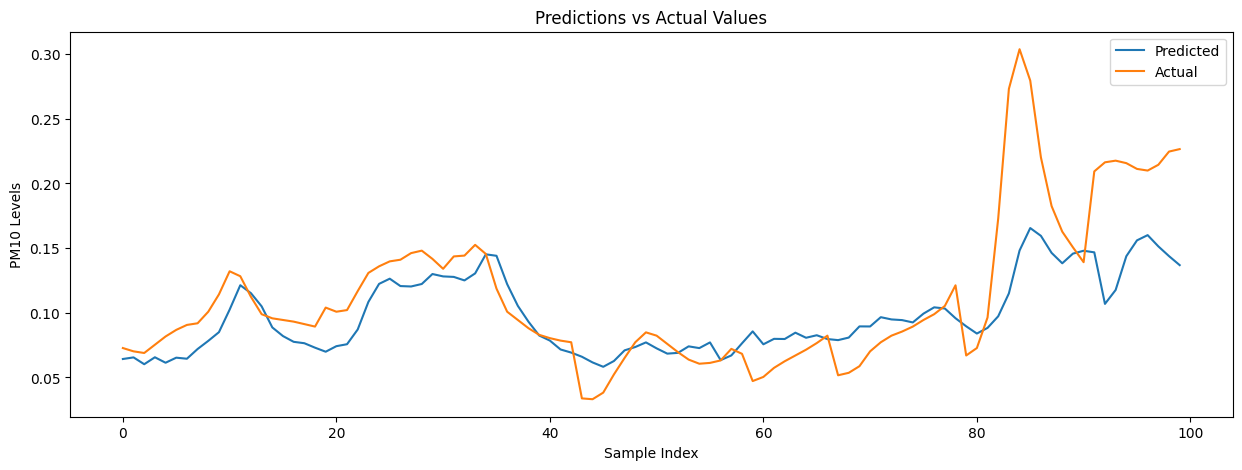

In [60]:
# Load the trained model
model = PM25_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model.load_state_dict(torch.load('pol_models/pm_25_model_state.pt'))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Create a DataLoader for the test dataset if not already created
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

predictions = []
actuals = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions.append(outputs.cpu().numpy())
        actuals.append(targets.cpu().numpy())

# Convert lists to arrays
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Calculate the R² Score
r2 = r2_score(actuals, predictions)
print(f'R² Score: {r2:.4f}')

# Plot Predictions vs Actual Values
plt.figure(figsize=(15, 5))
plt.plot(predictions[:100, 0], label='Predicted')
plt.plot(actuals[:100, 0], label='Actual')
plt.title('Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('PM10 Levels')
plt.legend()
plt.show()


# carbon_monoxide

In [61]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Carbon_monoxide')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

In [62]:
# saving this data
pivot_df.to_csv('pol_data/carbon_monoxide_data.csv', index=True)

In [63]:
# Load the transformed dataset
pivot_df = pd.read_csv('pol_data/carbon_monoxide_data.csv',  index_col='Date', parse_dates=True)

In [64]:
# Normalize the data
carbon_monoxide_scaler = MinMaxScaler()
scaled_data = carbon_monoxide_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(carbon_monoxide_scaler, 'carbon_monoxide_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")

Input shape: (9684, 300, 300)
Output shape: (9684, 300)


In [65]:
# Split the data into training and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [68]:
X_train_tensor.shape, X_test_tensor.shape

(torch.Size([8957, 300, 300]), torch.Size([727, 300, 300]))

In [66]:
# Create DataLoader
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [69]:
# seeding
torch.manual_seed(0)

class carbon_monoxide_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(carbon_monoxide_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, lookback, num_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, num_features, lookback)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 64, lookback//2)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 128, lookback//4)
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, lookback//4, 128)
        x = self.dropout(x)
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Shape: (batch_size, lookback//4, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction
        out = self.relu(out)
        out = self.fc2(out)  # Shape: (batch_size, output_size)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2
output_size = X_train.shape[2]

# Instantiate the model
model = carbon_monoxide_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Save the model state
torch.save(model.state_dict(), "pol_models/carbon_monoxide_model_state.pt")


Epoch [1/20], Loss: 0.0019
Epoch [2/20], Loss: 0.0030
Epoch [3/20], Loss: 0.0072
Epoch [4/20], Loss: 0.0023
Epoch [5/20], Loss: 0.0038
Epoch [6/20], Loss: 0.0028
Epoch [7/20], Loss: 0.0017
Epoch [8/20], Loss: 0.0021
Epoch [9/20], Loss: 0.0023
Epoch [10/20], Loss: 0.0039
Epoch [11/20], Loss: 0.0013
Epoch [12/20], Loss: 0.0031
Epoch [13/20], Loss: 0.0023
Epoch [14/20], Loss: 0.0017
Epoch [15/20], Loss: 0.0020
Epoch [16/20], Loss: 0.0013
Epoch [17/20], Loss: 0.0015
Epoch [18/20], Loss: 0.0017
Epoch [19/20], Loss: 0.0018
Epoch [20/20], Loss: 0.0019
Test Loss: 0.0009


R² Score: 0.0712


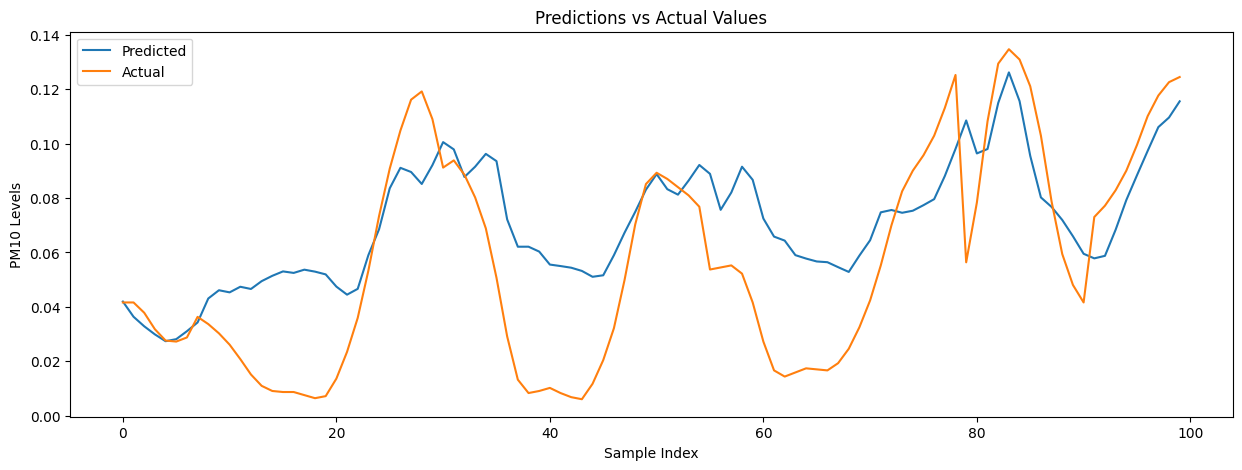

In [70]:
# Load the trained model
model = carbon_monoxide_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model.load_state_dict(torch.load('pol_models/pm_25_model_state.pt'))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Create a DataLoader for the test dataset if not already created
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

predictions = []
actuals = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions.append(outputs.cpu().numpy())
        actuals.append(targets.cpu().numpy())

# Convert lists to arrays
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Calculate the R² Score
r2 = r2_score(actuals, predictions)
print(f'R² Score: {r2:.4f}')

# Plot Predictions vs Actual Values
plt.figure(figsize=(15, 5))
plt.plot(predictions[:100, 0], label='Predicted')
plt.plot(actuals[:100, 0], label='Actual')
plt.title('Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('PM10 Levels')
plt.legend()
plt.show()


# nitrogen_dioxide

In [ ]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Nitrogen_dioxide')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

# saving this data
pivot_df.to_csv('nitrogen_dioxide_data.csv', index=True)

# Load the transformed dataset
pivot_df = pd.read_csv('nitrogen_dioxide_data.csv',  index_col='Date', parse_dates=True)


# Normalize the data
nitrogen_dioxide_scaler = MinMaxScaler()
scaled_data = nitrogen_dioxide_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(nitrogen_dioxide_scaler, 'nitrogen_dioxide_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [72]:
# seeding
torch.manual_seed(0)

class nitrogen_dioxide_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(nitrogen_dioxide_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, lookback, num_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, num_features, lookback)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 64, lookback//2)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 128, lookback//4)
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, lookback//4, 128)
        x = self.dropout(x)
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Shape: (batch_size, lookback//4, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction
        out = self.relu(out)
        out = self.fc2(out)  # Shape: (batch_size, output_size)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2
output_size = X_train.shape[2]

# Instantiate the model
model = nitrogen_dioxide_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Save the model state
torch.save(model.state_dict(), "pol_models/nitrogen_dioxide_model_state.pt")

Epoch [1/20], Loss: 0.0120
Epoch [2/20], Loss: 0.0113
Epoch [3/20], Loss: 0.0080
Epoch [4/20], Loss: 0.0037
Epoch [5/20], Loss: 0.0065
Epoch [6/20], Loss: 0.0122
Epoch [7/20], Loss: 0.0026
Epoch [8/20], Loss: 0.0015
Epoch [9/20], Loss: 0.0197
Epoch [10/20], Loss: 0.0085
Epoch [11/20], Loss: 0.0039
Epoch [12/20], Loss: 0.0036
Epoch [13/20], Loss: 0.0048
Epoch [14/20], Loss: 0.0020
Epoch [15/20], Loss: 0.0019
Epoch [16/20], Loss: 0.0034
Epoch [17/20], Loss: 0.0087
Epoch [18/20], Loss: 0.0064
Epoch [19/20], Loss: 0.0006
Epoch [20/20], Loss: 0.0024
Test Loss: 0.0044


# sulphur_dioxide 

In [74]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Sulphur_dioxide')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

# saving this data
pivot_df.to_csv('pol_data/sulphur_dioxide_data.csv', index=True)

# Load the transformed dataset
pivot_df = pd.read_csv('pol_data/sulphur_dioxide_data.csv',  index_col='Date', parse_dates=True)


# Normalize the data
sulphur_dioxide_scaler = MinMaxScaler()
scaled_data = sulphur_dioxide_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(sulphur_dioxide_scaler, 'sulphur_dioxide_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")



# Split the data into training and test sets
train_size = int(len(X) * 0.925)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class sulphur_dioxide_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(sulphur_dioxide_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, lookback, num_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, num_features, lookback)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 64, lookback//2)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 128, lookback//4)
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, lookback//4, 128)
        x = self.dropout(x)
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Shape: (batch_size, lookback//4, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction
        out = self.relu(out)
        out = self.fc2(out)  # Shape: (batch_size, output_size)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2
output_size = X_train.shape[2]

# Instantiate the model
model = sulphur_dioxide_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Save the model state
torch.save(model.state_dict(), "pol_models/sulphur_dioxide_model_state.pt")

Input shape: (9684, 300, 300)
Output shape: (9684, 300)
Epoch [1/20], Loss: 0.0102
Epoch [2/20], Loss: 0.0065
Epoch [3/20], Loss: 0.0050
Epoch [4/20], Loss: 0.0061
Epoch [5/20], Loss: 0.0051
Epoch [6/20], Loss: 0.0052
Epoch [7/20], Loss: 0.0060
Epoch [8/20], Loss: 0.0053
Epoch [9/20], Loss: 0.0056
Epoch [10/20], Loss: 0.0040
Epoch [11/20], Loss: 0.0044
Epoch [12/20], Loss: 0.0043
Epoch [13/20], Loss: 0.0055
Epoch [14/20], Loss: 0.0038
Epoch [15/20], Loss: 0.0041
Epoch [16/20], Loss: 0.0039
Epoch [17/20], Loss: 0.0045
Epoch [18/20], Loss: 0.0041
Epoch [19/20], Loss: 0.0045
Epoch [20/20], Loss: 0.0041
Test Loss: 0.0020


# ozone

In [75]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Ozone')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

# saving this data
pivot_df.to_csv('pol_data/ozone_data.csv', index=True)

# Load the transformed dataset
pivot_df = pd.read_csv('pol_data/ozone_data.csv',  index_col='Date', parse_dates=True)


# Normalize the data
ozone_scaler = MinMaxScaler()
scaled_data = ozone_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(ozone_scaler, 'ozone_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")



# Split the data into training and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class ozone_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(ozone_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, lookback, num_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, num_features, lookback)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 64, lookback//2)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 128, lookback//4)
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, lookback//4, 128)
        x = self.dropout(x)
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Shape: (batch_size, lookback//4, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction
        out = self.relu(out)
        out = self.fc2(out)  # Shape: (batch_size, output_size)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2
output_size = X_train.shape[2]

# Instantiate the model
model = ozone_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Save the model state
torch.save(model.state_dict(), "pol_models/ozone_model_state.pt")

Input shape: (9684, 300, 300)
Output shape: (9684, 300)
Epoch [1/20], Loss: 0.0079
Epoch [2/20], Loss: 0.0073
Epoch [3/20], Loss: 0.0049
Epoch [4/20], Loss: 0.0056
Epoch [5/20], Loss: 0.0047
Epoch [6/20], Loss: 0.0042
Epoch [7/20], Loss: 0.0047
Epoch [8/20], Loss: 0.0049
Epoch [9/20], Loss: 0.0043
Epoch [10/20], Loss: 0.0044
Epoch [11/20], Loss: 0.0055
Epoch [12/20], Loss: 0.0040
Epoch [13/20], Loss: 0.0044
Epoch [14/20], Loss: 0.0037
Epoch [15/20], Loss: 0.0046
Epoch [16/20], Loss: 0.0045
Epoch [17/20], Loss: 0.0044
Epoch [18/20], Loss: 0.0046
Epoch [19/20], Loss: 0.0042
Epoch [20/20], Loss: 0.0042
Test Loss: 0.0082


# dust

In [78]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Dust')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

# saving this data
pivot_df.to_csv('pol_data/dust_data.csv', index=True)

# Load the transformed dataset
pivot_df = pd.read_csv('pol_data/dust_data.csv',  index_col='Date', parse_dates=True)


# Normalize the data
dust_scaler = MinMaxScaler()
scaled_data = dust_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(dust_scaler, 'dust_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")



# Split the data into training and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class dust_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(dust_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, lookback, num_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, num_features, lookback)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 64, lookback//2)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 128, lookback//4)
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, lookback//4, 128)
        x = self.dropout(x)
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Shape: (batch_size, lookback//4, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction
        out = self.relu(out)
        out = self.fc2(out)  # Shape: (batch_size, output_size)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2
output_size = X_train.shape[2]

# Instantiate the model
model = dust_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Save the model state
torch.save(model.state_dict(), "pol_models/dust_model_state.pt")

Input shape: (9684, 300, 300)
Output shape: (9684, 300)
Epoch [1/20], Loss: 0.0039
Epoch [2/20], Loss: 0.0020
Epoch [3/20], Loss: 0.0010
Epoch [4/20], Loss: 0.0024
Epoch [5/20], Loss: 0.0022
Epoch [6/20], Loss: 0.0010
Epoch [7/20], Loss: 0.0013
Epoch [8/20], Loss: 0.0007
Epoch [9/20], Loss: 0.0020
Epoch [10/20], Loss: 0.0007
Epoch [11/20], Loss: 0.0014
Epoch [12/20], Loss: 0.0008
Epoch [13/20], Loss: 0.0015
Epoch [14/20], Loss: 0.0012
Epoch [15/20], Loss: 0.0018
Epoch [16/20], Loss: 0.0007
Epoch [17/20], Loss: 0.0008
Epoch [18/20], Loss: 0.0013
Epoch [19/20], Loss: 0.0010
Epoch [20/20], Loss: 0.0007
Test Loss: 0.0054


### AQI

In [9]:
# creating aqi column in the merge_data_1 dataframe
merge_data_1['Aqi'] = merge_data_1['Pm2_5'] * 0.25 + merge_data_1['Pm10'] * 0.25 + merge_data_1['Nitrogen_dioxide'] * 0.15 + merge_data_1['Sulphur_dioxide'] * 0.1 + merge_data_1['Carbon_monoxide'] * 0.1 + merge_data_1['Ozone'] * 0.1 + merge_data_1['Dust'] * 0.05


In [10]:
merge_data_1

,Carbon_monoxide,Date,District,Dust,Location_id,Nitrogen_dioxide,Ozone,Pm10,Pm2_5,Sulphur_dioxide,Aqi
0,142.0,2023-05-01 00:00:00,Bahawalpur,8.0,39.0,1.4,54.0,22.3,13.2,1.0,29.185
1,143.0,2023-05-01 01:00:00,Bahawalpur,10.0,39.0,1.3,57.0,22.6,13.6,1.0,29.845
2,145.0,2023-05-01 02:00:00,Bahawalpur,12.0,39.0,1.3,61.0,23.2,13.6,0.9,30.685
3,145.0,2023-05-01 03:00:00,Bahawalpur,15.0,39.0,1.1,69.0,25.4,13.6,0.9,32.155
4,143.0,2023-05-01 04:00:00,Bahawalpur,18.0,39.0,0.9,79.0,28.8,14.4,1.0,34.135
...,...,...,...,...,...,...,...,...,...,...,...
2995195,579.0,2024-06-19 19:00:00,NaN,2.0,233.0,32.5,66.0,29.2,19.9,3.3,82.080
2995196,601.0,2024-06-19 20:00:00,NaN,2.0,233.0,33.6,50.0,27.5,18.7,2.9,82.080
2995197,599.0,2024-06-19 21:00:00,NaN,2.0,233.0,32.9,39.0,25.4,17.2,2.6,79.745
2995198,559.0,2024-06-19 22:00:00,NaN,1.0,233.0,29.2,32.0,22.9,15.5,2.3,73.360


In [11]:
merge_data_1.isna().sum()   

Carbon_monoxide           0
Date                      0
District            1519200
Dust                      0
Location_id               0
Nitrogen_dioxide          0
Ozone                     0
Pm10                      0
Pm2_5                     0
Sulphur_dioxide           0
Aqi                       0
dtype: int64

#### Normal AQI prediction

In [87]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Aqi')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

# saving this data
pivot_df.to_csv('pol_data/aqi_data.csv', index=True)

# Load the transformed dataset
pivot_df = pd.read_csv('pol_data/aqi_data.csv',  index_col='Date', parse_dates=True)


# Normalize the data
aqi_scaler = MinMaxScaler()
scaled_data = aqi_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(aqi_scaler, 'aqi_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")



# Split the data into training and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class aqi_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(aqi_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, lookback, num_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, num_features, lookback)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 64, lookback//2)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 128, lookback//4)
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, lookback//4, 128)
        x = self.dropout(x)
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Shape: (batch_size, lookback//4, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction
        out = self.relu(out)
        out = self.fc2(out)  # Shape: (batch_size, output_size)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2
output_size = X_train.shape[2]

# Instantiate the model
model = aqi_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Save the model state
torch.save(model.state_dict(), "pol_models/aqi_model_state.pt")

Input shape: (9684, 300, 300)
Output shape: (9684, 300)
Epoch [1/20], Loss: 0.0050
Epoch [2/20], Loss: 0.0041
Epoch [3/20], Loss: 0.0040
Epoch [4/20], Loss: 0.0050
Epoch [5/20], Loss: 0.0025
Epoch [6/20], Loss: 0.0034
Epoch [7/20], Loss: 0.0034
Epoch [8/20], Loss: 0.0025
Epoch [9/20], Loss: 0.0026
Epoch [10/20], Loss: 0.0036
Epoch [11/20], Loss: 0.0029
Epoch [12/20], Loss: 0.0029
Epoch [13/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0023
Epoch [15/20], Loss: 0.0021
Epoch [16/20], Loss: 0.0024
Epoch [17/20], Loss: 0.0024
Epoch [18/20], Loss: 0.0023
Epoch [19/20], Loss: 0.0020
Epoch [20/20], Loss: 0.0031
Test Loss: 0.0022


#### Aqi from last 30 days

In [15]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Aqi')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

# saving this data
pivot_df.to_csv('pol_data/aqi_data.csv', index=True)

# Load the transformed dataset
pivot_df = pd.read_csv('pol_data/aqi_data.csv',  index_col='Date', parse_dates=True)

# excluding the last 30 days hours
pivot_df = pivot_df[:-720]


# Normalize the data
aqi_scaler = MinMaxScaler()
scaled_data = aqi_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(aqi_scaler, 'aqi_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")


# Split the data into training and test sets
train_size = int(len(X) * 0.925)
# Split the data into training and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# seeding
torch.manual_seed(0)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class aqi_last_30_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(aqi_last_30_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, lookback, num_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, num_features, lookback)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 64, lookback//2)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 128, lookback//4)
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, lookback//4, 128)
        x = self.dropout(x)
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Shape: (batch_size, lookback//4, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction
        out = self.relu(out)
        out = self.fc2(out)  # Shape: (batch_size, output_size)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2
output_size = X_train.shape[2]

# Instantiate the model
model = aqi_last_30_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Save the model state
torch.save(model.state_dict(), "pol_models/aqi_last_30_model_state.pt")

Input shape: (8964, 300, 300)
Output shape: (8964, 300)
Epoch [1/20], Loss: 0.0034
Epoch [2/20], Loss: 0.0070
Epoch [3/20], Loss: 0.0079
Epoch [4/20], Loss: 0.0096
Epoch [5/20], Loss: 0.0055
Epoch [6/20], Loss: 0.0020
Epoch [7/20], Loss: 0.0040
Epoch [8/20], Loss: 0.0029
Epoch [9/20], Loss: 0.0043
Epoch [10/20], Loss: 0.0022
Epoch [11/20], Loss: 0.0026
Epoch [12/20], Loss: 0.0027
Epoch [13/20], Loss: 0.0015
Epoch [14/20], Loss: 0.0009
Epoch [15/20], Loss: 0.0019
Epoch [16/20], Loss: 0.0044
Epoch [17/20], Loss: 0.0014
Epoch [18/20], Loss: 0.0019
Epoch [19/20], Loss: 0.0022
Epoch [20/20], Loss: 0.0015
Test Loss: 0.0014


In [17]:
# Number of hours in 60 days
forecast_horizon = 60 * 24

# Start with the last sequence from the test data
last_sequence = X_test_tensor[-1].unsqueeze(0).to(device)

# Collect the predictions
forecasted_values = []

model.eval()
with torch.no_grad():
    current_sequence = last_sequence
    for _ in range(forecast_horizon):
        # Make prediction
        prediction = model(current_sequence)
        forecasted_values.append(prediction.cpu().numpy())

        # Update the sequence by appending the prediction and removing the first time step
        new_sequence = torch.cat((current_sequence[:, 1:, :], prediction.unsqueeze(1)), dim=1)
        current_sequence = new_sequence

# Convert list of arrays into a single array
forecasted_values = np.concatenate(forecasted_values, axis=0)

# Inverse transform the predictions to original scale
forecasted_values_inverse = aqi_scaler.inverse_transform(forecasted_values)

# Convert to DataFrame for easier visualization
forecasted_df = pd.DataFrame(forecasted_values_inverse, columns=pivot_df.columns)
forecasted_df.index = pd.date_range(start=pivot_df.index[-1] + pd.Timedelta(hours=1), periods=forecast_horizon, freq='H')

# Reverse the pivot operation
reverted_df = forecasted_df.melt(ignore_index=False, var_name='location_id', value_name='Aqi')
# Display the forecasted DataFrame
reverted_df.head()

C:\Users\timmy\AppData\Local\Temp\ipykernel_14492\2662528049.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecasted_df.index = pd.date_range(start=pivot_df.index[-1] + pd.Timedelta(hours=1), periods=forecast_horizon, freq='H')


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0
2024-05-21 00:00:00,49.711388,70.303879,84.438034,68.436630,82.701126,64.487427,86.760353,50.708832,73.888145,60.742641,...,89.853111,67.112320,64.127235,64.133148,63.155964,67.400352,93.037331,97.086861,46.721817,52.588261
2024-05-21 01:00:00,49.076969,73.748253,86.085999,68.920631,81.880684,64.428017,87.691833,50.969784,76.393425,61.785576,...,92.754578,64.920509,68.224136,67.794884,67.390396,68.752907,91.228065,98.048569,46.396744,53.028961
2024-05-21 02:00:00,49.870697,75.412354,83.830933,69.776062,82.600883,64.511940,85.250977,51.681393,80.546295,63.347622,...,90.896500,63.489334,71.811447,70.400330,70.826515,70.419708,87.830147,96.098167,45.810837,52.726315
2024-05-21 03:00:00,49.184444,74.920929,81.820808,68.107613,82.345901,65.316162,82.285172,51.239338,78.085098,62.060207,...,86.727058,64.002968,71.000122,70.148453,70.111092,69.077034,85.172104,91.831352,45.557507,51.946419
2024-05-21 04:00:00,48.856476,71.203300,77.637924,65.429573,82.497368,65.900749,77.673859,50.448158,74.042511,59.527409,...,80.684250,64.582108,67.363113,66.994949,66.384277,66.496437,81.317932,86.145348,45.261772,50.523037


In [19]:
# Reverse the pivot operation
reverted_df = forecasted_df.melt(ignore_index=False, var_name='location_id', value_name='Aqi')

In [20]:
reverted_df.head()

,location_id,Aqi
2024-05-21 00:00:00,1.0,49.711388
2024-05-21 01:00:00,1.0,49.076969
2024-05-21 02:00:00,1.0,49.870697
2024-05-21 03:00:00,1.0,49.184444
2024-05-21 04:00:00,1.0,48.856476


In [21]:
# save as aqi 30 days lag
reverted_df.to_csv('pol_data/aqi_30_days_lag.csv', index=True)

### Last 14 days

In [22]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Aqi')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

# saving this data
pivot_df.to_csv('pol_data/aqi_data.csv', index=True)

# Load the transformed dataset
pivot_df = pd.read_csv('pol_data/aqi_data.csv',  index_col='Date', parse_dates=True)

# excluding the last 14 days hours
pivot_df = pivot_df[:-336]


# Normalize the data
aqi_scaler = MinMaxScaler()
scaled_data = aqi_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(aqi_scaler, 'aqi_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")



# Split the data into training and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class aqi_last_14_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(aqi_last_14_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, lookback, num_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, num_features, lookback)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 64, lookback//2)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 128, lookback//4)
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, lookback//4, 128)
        x = self.dropout(x)
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Shape: (batch_size, lookback//4, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction
        out = self.relu(out)
        out = self.fc2(out)  # Shape: (batch_size, output_size)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2
output_size = X_train.shape[2]

# Instantiate the model
model = aqi_last_14_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Save the model state
torch.save(model.state_dict(), "pol_models/aqi_last_14_model_state.pt")

Input shape: (9348, 300, 300)
Output shape: (9348, 300)
Epoch [1/20], Loss: 0.0154
Epoch [2/20], Loss: 0.0044
Epoch [3/20], Loss: 0.0036
Epoch [4/20], Loss: 0.0014
Epoch [5/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0079
Epoch [7/20], Loss: 0.0018
Epoch [8/20], Loss: 0.0037
Epoch [9/20], Loss: 0.0041
Epoch [10/20], Loss: 0.0068
Epoch [11/20], Loss: 0.0051
Epoch [12/20], Loss: 0.0012
Epoch [13/20], Loss: 0.0031
Epoch [14/20], Loss: 0.0011
Epoch [15/20], Loss: 0.0050
Epoch [16/20], Loss: 0.0017
Epoch [17/20], Loss: 0.0015
Epoch [18/20], Loss: 0.0022
Epoch [19/20], Loss: 0.0016
Epoch [20/20], Loss: 0.0040
Test Loss: 0.0019


In [23]:
# Number of hours in 60 days
forecast_horizon = 44 * 24

# Start with the last sequence from the test data
last_sequence = X_test_tensor[-1].unsqueeze(0).to(device)

# Collect the predictions
forecasted_values = []

model.eval()
with torch.no_grad():
    current_sequence = last_sequence
    for _ in range(forecast_horizon):
        # Make prediction
        prediction = model(current_sequence)
        forecasted_values.append(prediction.cpu().numpy())

        # Update the sequence by appending the prediction and removing the first time step
        new_sequence = torch.cat((current_sequence[:, 1:, :], prediction.unsqueeze(1)), dim=1)
        current_sequence = new_sequence

# Convert list of arrays into a single array
forecasted_values = np.concatenate(forecasted_values, axis=0)

# Inverse transform the predictions to original scale
forecasted_values_inverse = aqi_scaler.inverse_transform(forecasted_values)

# Convert to DataFrame for easier visualization
forecasted_df = pd.DataFrame(forecasted_values_inverse, columns=pivot_df.columns)
forecasted_df.index = pd.date_range(start=pivot_df.index[-1] + pd.Timedelta(hours=1), periods=forecast_horizon, freq='H')

# Reverse the pivot operation
reverted_df = forecasted_df.melt(ignore_index=False, var_name='location_id', value_name='Aqi')
# Display the forecasted DataFrame
reverted_df.head()

C:\Users\timmy\AppData\Local\Temp\ipykernel_14492\1939847942.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecasted_df.index = pd.date_range(start=pivot_df.index[-1] + pd.Timedelta(hours=1), periods=forecast_horizon, freq='H')


,location_id,Aqi
2024-06-06 00:00:00,1.0,83.928032
2024-06-06 01:00:00,1.0,91.738441
2024-06-06 02:00:00,1.0,96.393623
2024-06-06 03:00:00,1.0,95.863342
2024-06-06 04:00:00,1.0,95.086128


In [24]:
# save as aqi 30 days lag
reverted_df.to_csv('pol_data/aqi_14_days_lag.csv', index=True)

#### Last 7 days

In [25]:
# Pivot the data to get AQI values in columns for each location at each hour
pivot_df = merge_data_1.pivot_table(index='Date', columns='Location_id', values='Aqi')

# Optional: Sort the columns to ensure locations are in order (if not already)
pivot_df = pivot_df.sort_index(axis=1)

# saving this data
pivot_df.to_csv('pol_data/aqi_data.csv', index=True)

# Load the transformed dataset
pivot_df = pd.read_csv('pol_data/aqi_data.csv',  index_col='Date', parse_dates=True)

# excluding the last 7 days hours
pivot_df = pivot_df[:-168]


# Normalize the data
aqi_scaler = MinMaxScaler()
scaled_data = aqi_scaler.fit_transform(pivot_df)

# saving the scaler

joblib.dump(aqi_scaler, 'aqi_scaler.pkl')

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 300  # Define the lookback period
X, y = create_sequences(scaled_df.values, lookback)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")



# Split the data into training and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class aqi_last_7_CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(aqi_last_7_CNN_LSTM, self).__init__()
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layers
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
    
    def forward(self, x):
        # Initial input shape: (batch_size, lookback, num_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, num_features, lookback)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 64, lookback//2)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)  # Shape: (batch_size, 128, lookback//4)
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, lookback//4, 128)
        x = self.dropout(x)
        
        # LSTM forward
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # Shape: (batch_size, lookback//4, hidden_size)
        
        # Fully connected layers
        out = self.fc1(out[:, -1, :])  # Use the last time step's output for prediction
        out = self.relu(out)
        out = self.fc2(out)  # Shape: (batch_size, output_size)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2
output_size = X_train.shape[2]

# Instantiate the model
model = aqi_last_7_CNN_LSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
    
    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Save the model state
torch.save(model.state_dict(), "pol_models/aqi_last_7_model_state.pt")

Input shape: (9516, 300, 300)
Output shape: (9516, 300)
Epoch [1/20], Loss: 0.0023
Epoch [2/20], Loss: 0.0028
Epoch [3/20], Loss: 0.0027
Epoch [4/20], Loss: 0.0017
Epoch [5/20], Loss: 0.0029
Epoch [6/20], Loss: 0.0016
Epoch [7/20], Loss: 0.0023
Epoch [8/20], Loss: 0.0015
Epoch [9/20], Loss: 0.0020
Epoch [10/20], Loss: 0.0024
Epoch [11/20], Loss: 0.0015
Epoch [12/20], Loss: 0.0050
Epoch [13/20], Loss: 0.0016
Epoch [14/20], Loss: 0.0034
Epoch [15/20], Loss: 0.0033
Epoch [16/20], Loss: 0.0017
Epoch [17/20], Loss: 0.0008
Epoch [18/20], Loss: 0.0021
Epoch [19/20], Loss: 0.0017
Epoch [20/20], Loss: 0.0027
Test Loss: 0.0018


In [26]:
# Number of hours in 60 days
forecast_horizon = 7 * 24

# Start with the last sequence from the test data
last_sequence = X_test_tensor[-1].unsqueeze(0).to(device)

# Collect the predictions
forecasted_values = []

model.eval()
with torch.no_grad():
    current_sequence = last_sequence
    for _ in range(forecast_horizon):
        # Make prediction
        prediction = model(current_sequence)
        forecasted_values.append(prediction.cpu().numpy())

        # Update the sequence by appending the prediction and removing the first time step
        new_sequence = torch.cat((current_sequence[:, 1:, :], prediction.unsqueeze(1)), dim=1)
        current_sequence = new_sequence

# Convert list of arrays into a single array
forecasted_values = np.concatenate(forecasted_values, axis=0)

# Inverse transform the predictions to original scale
forecasted_values_inverse = aqi_scaler.inverse_transform(forecasted_values)

# Convert to DataFrame for easier visualization
forecasted_df = pd.DataFrame(forecasted_values_inverse, columns=pivot_df.columns)
forecasted_df.index = pd.date_range(start=pivot_df.index[-1] + pd.Timedelta(hours=1), periods=forecast_horizon, freq='H')

# Reverse the pivot operation
reverted_df = forecasted_df.melt(ignore_index=False, var_name='location_id', value_name='Aqi')
# Display the forecasted DataFrame
reverted_df.head()

C:\Users\timmy\AppData\Local\Temp\ipykernel_14492\2617551668.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecasted_df.index = pd.date_range(start=pivot_df.index[-1] + pd.Timedelta(hours=1), periods=forecast_horizon, freq='H')


,location_id,Aqi
2024-06-13 00:00:00,1.0,63.198601
2024-06-13 01:00:00,1.0,65.554008
2024-06-13 02:00:00,1.0,67.802223
2024-06-13 03:00:00,1.0,70.359802
2024-06-13 04:00:00,1.0,72.201065


In [27]:
# save as aqi 30 days lag
reverted_df.to_csv('pol_data/aqi_7_days_lag.csv', index=True)